##**Project 7: Bank Turnover**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**

CustomerId: Unique ID which is assigned to each customer

Surname: Last name of the customer 

CreditScore: It defines the credit history of the customer.  

Geography: A customer’s location    

Gender: It defines the Gender of the customer   

Age: Age of the customer     

Tenure: Number of years for which the customer has been with the bank 

NumOfProducts: It refers to the number of products that a customer has purchased through the bank.

Balance: Account balance

HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.

EstimatedSalary: Estimated salary 

isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )


Requirements: 
There are two parts to the submission: 
1. A well commented Jupyter notebook [format - .ipynb]
2. The same file converted to HTML format- Utilize Jupyter notebook to produce this output. 

Tasks: 
1. Prepare the notebook
2. Interpret the data
3. Univariate analysis
4. Bivariate analysis
5. Prepare data for model
6. Create model one (description of features)
6.A. Add Layers
6.B. Activations 
6.C. Optimize
7. Create Model 2- Add early stop
7.A.Itialize weights
8. Create Model 3- Add dropout
8.A. Model 3 Evaluation
9. Possible other models
10. Conclusion and Recommendation


In [1]:
# Access the drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Organize imports and packages to show logic and make it easy to see what is missing or necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow.keras
from tensorflow.keras import backend
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam_experimental as adam
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [3]:
# access the data
from google.colab import files
uploaded = files.upload()


Saving Churn.csv to Churn (3).csv


In [4]:
# import the data file
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Churn.csv']))
# Dataset is now stored in a Pandas Dataframe

In [5]:
# Begin to examine the data. Should be 10,000 rows and 14 fields. It is- a successful import. 
print (df2)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [6]:
# examine the data
df2.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
# Changing the numerical format to make it easier to read. 
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [8]:
df2.describe().T
# Great size disparities exist between the binary data and salary and balance. 

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [9]:
# Examine the data for NaN or to get a feel of the data.
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [10]:
# Check for NaN and understand how the environment sees the data. 3 Dtypes are objects. Since I will drop Surname, I will probably only need to convert Geography and Gender to categorical and one hot encode.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
#finding the null values. None!
df2.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# More data examination.
df2.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


Check the data balance and distribution in the target variable

In [13]:
#Number of distinct categories or classes i.e., Stay or leave
df2['Exited'].nunique()

2

In [14]:
#checking the percentage of each class in the dataset
(df2.Exited.value_counts())/(df2.Exited.count())

0   0.796
1   0.204
Name: Exited, dtype: float64

Conclusion: the data in the target variable is very imbalanced. This will affect the model, as some optimizers work better on balanced data. 

In [15]:
# start with data preprocessing and EDA using descriptive statistics and data visualization

# Univariate Analysis
Barplots

0    7963
1    2037
Name: Exited, dtype: int64


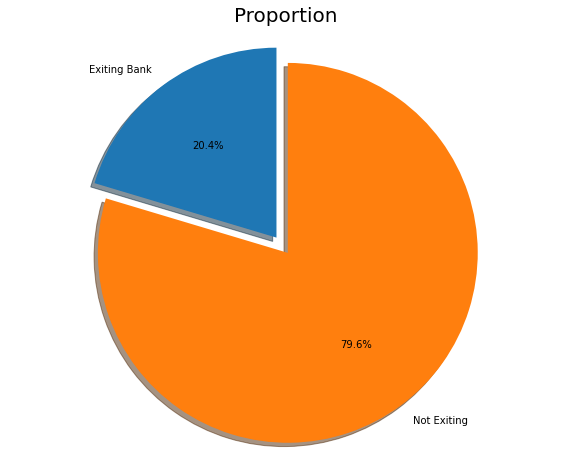

In [16]:
print(df2.Exited.value_counts())
labels = 'Exiting Bank', 'Not Exiting'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [df2.Exited[df2['Exited']==1].count(),df2.Exited[df2['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

In [17]:
import dataclasses
# function to create labeled barplots


def labeled_barplot(df2, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    df2: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df2[feature])  # length of the column
    count = df2[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df2,
        x=feature,
        palette="Paired",
        order=df2[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

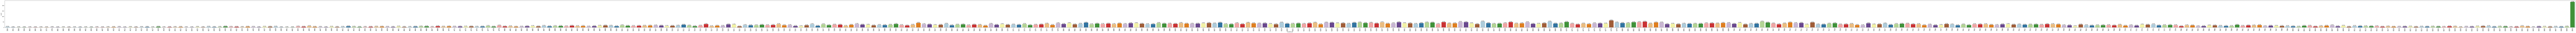

In [18]:
labeled_barplot(df2, "CreditScore", perc=True)

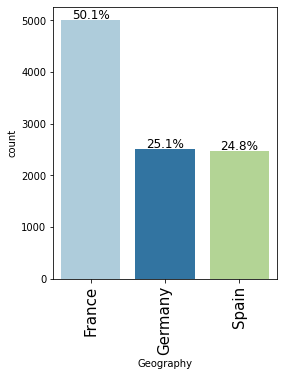

In [19]:
labeled_barplot(df2, "Geography", perc=True)

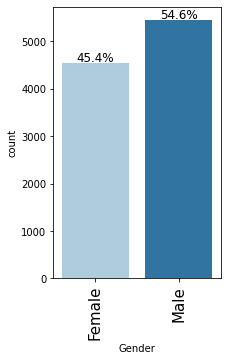

In [20]:
labeled_barplot(df2, "Gender", perc=True)

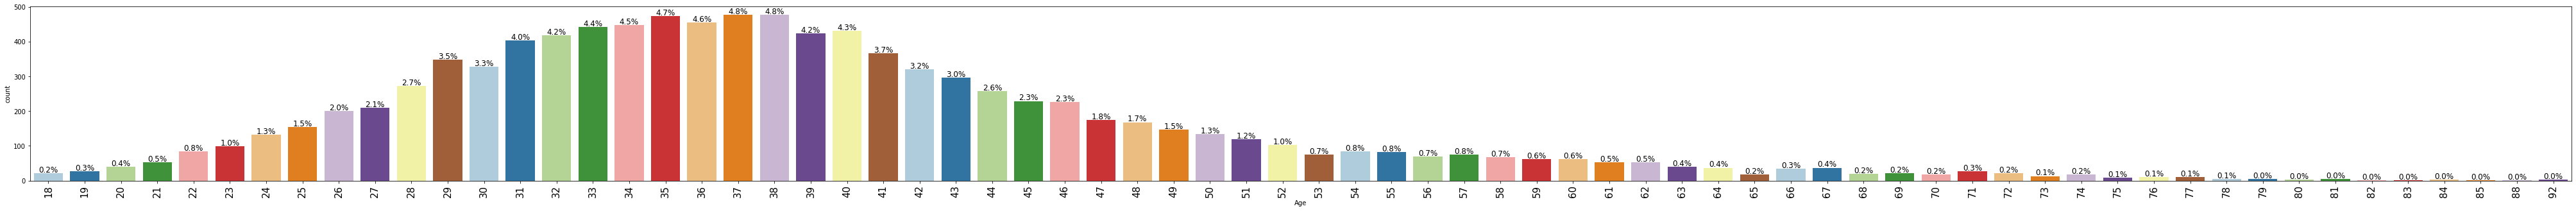

In [21]:
labeled_barplot(df2, "Age", perc=True)

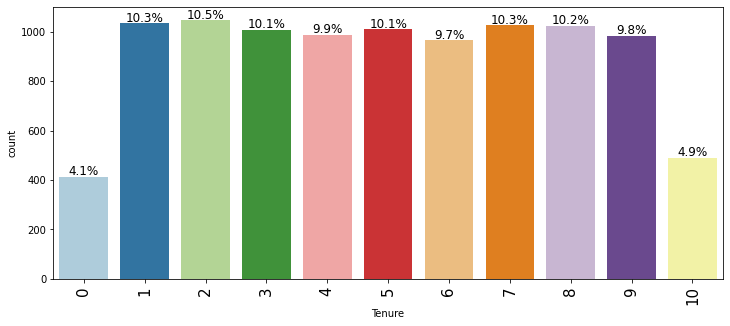

In [22]:
labeled_barplot(df2, "Tenure", perc=True)

In [23]:
#labeled_barplot(df2, "Balance", perc=True) ##Must change visualization

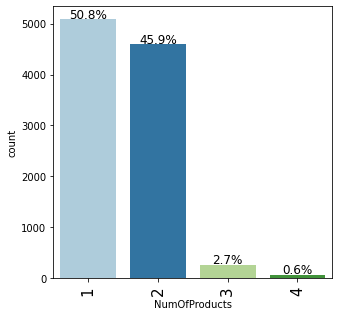

In [24]:
labeled_barplot(df2, "NumOfProducts", perc=True)

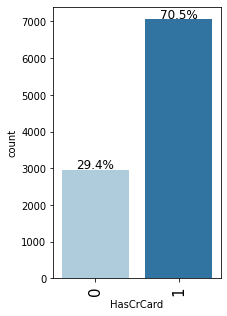

In [25]:
labeled_barplot(df2, "HasCrCard", perc=True)

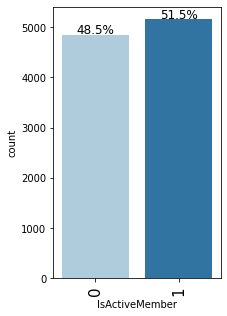

In [26]:
labeled_barplot(df2, "IsActiveMember", perc=True)

In [27]:
#labeled_barplot(df2, "EstimatedSalary", perc=True) ##Must change visualization

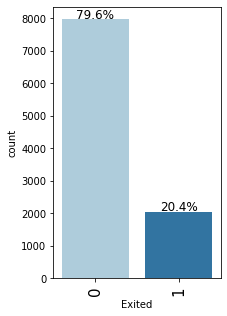

In [28]:
labeled_barplot(df2, "Exited", perc=True)

#Bivariate analysis
Heatmap
comparisons

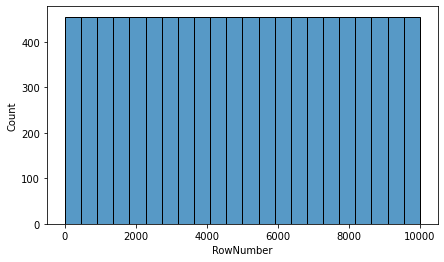

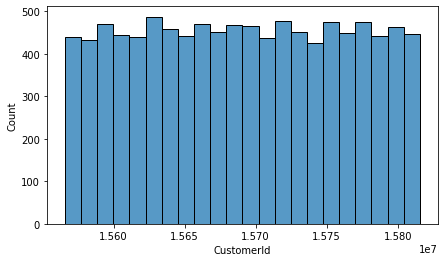

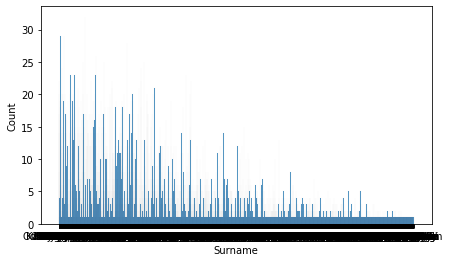

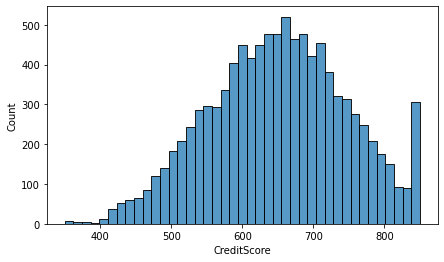

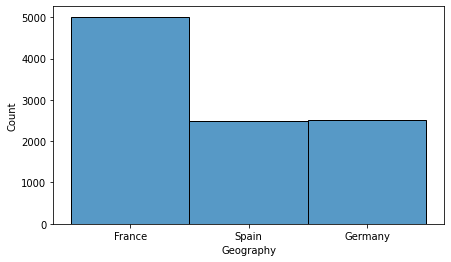

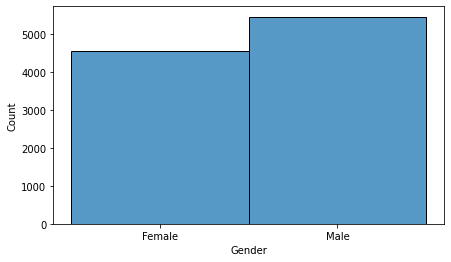

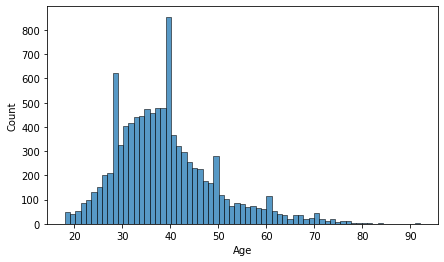

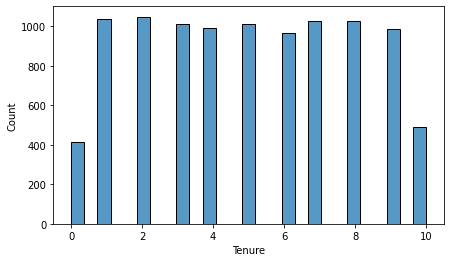

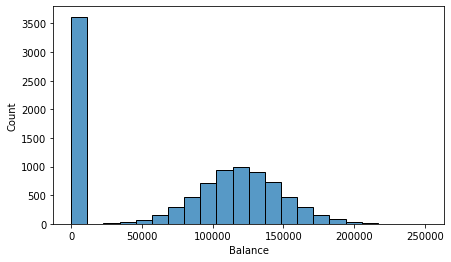

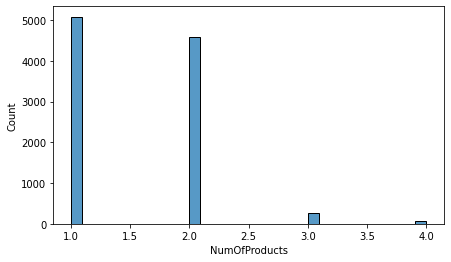

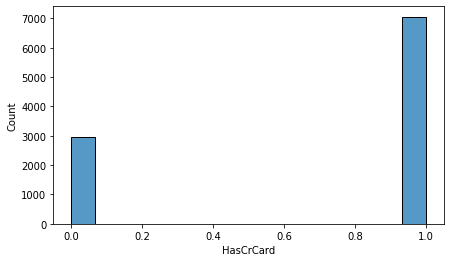

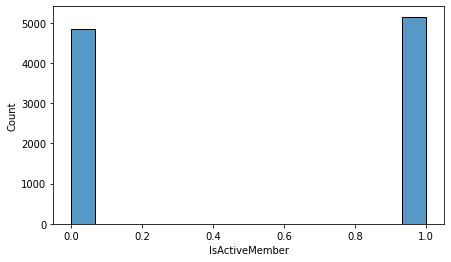

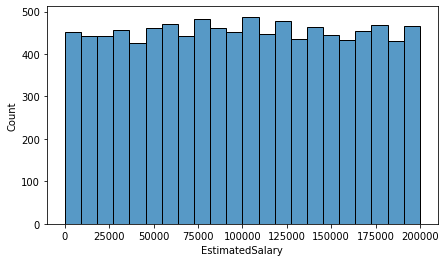

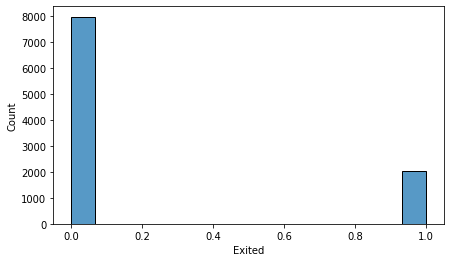

In [29]:
# data visualization; Not many have normal distributions. 
for i in df2.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df2, x=i)
    plt.show()

In [30]:
# function to plot a boxplot and a histogram along the same scale.
# From Great Learning course-work 

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

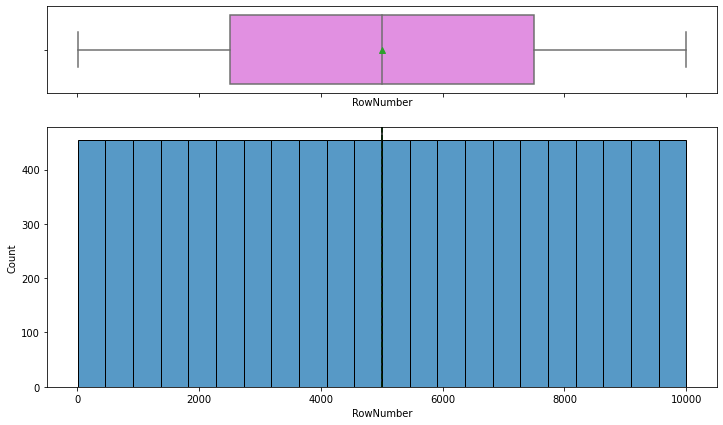

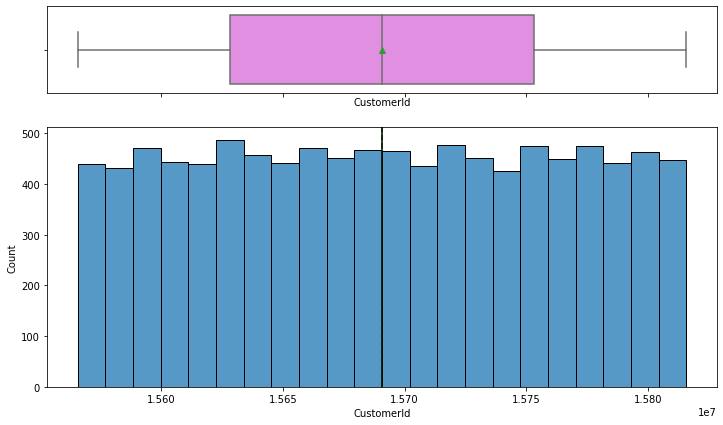

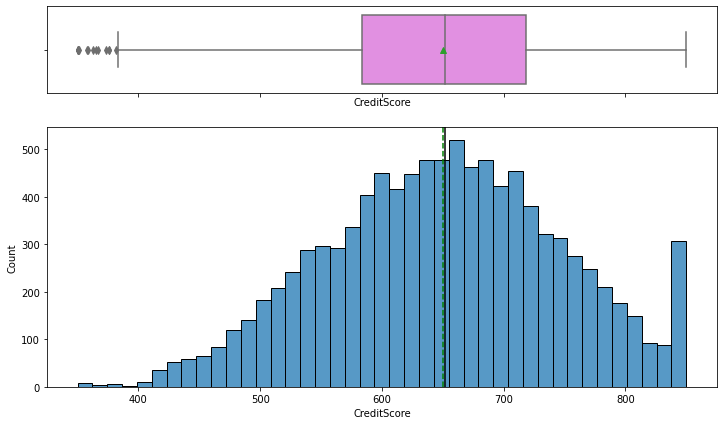

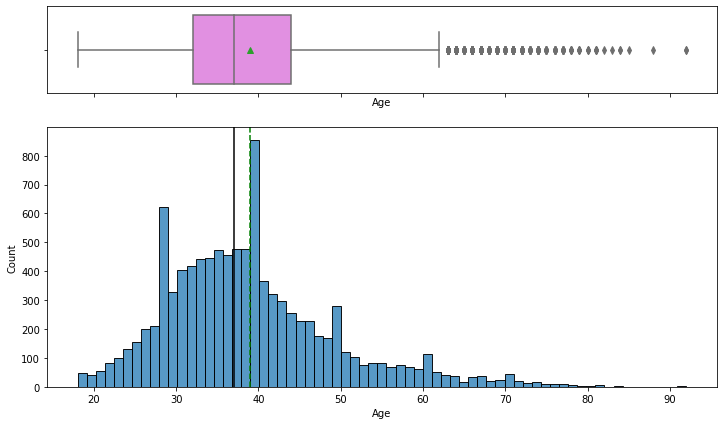

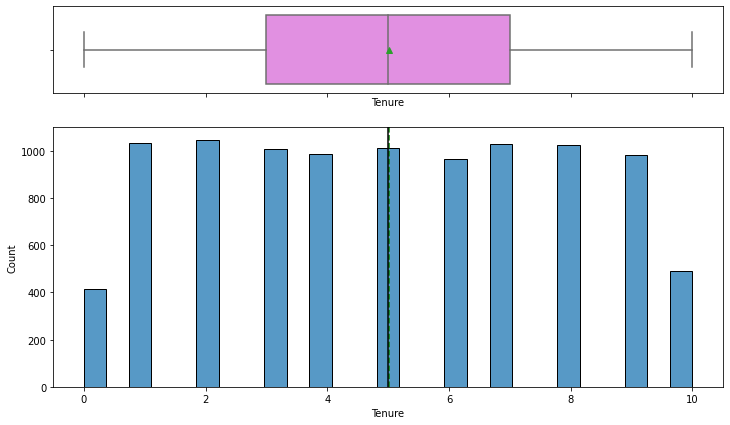

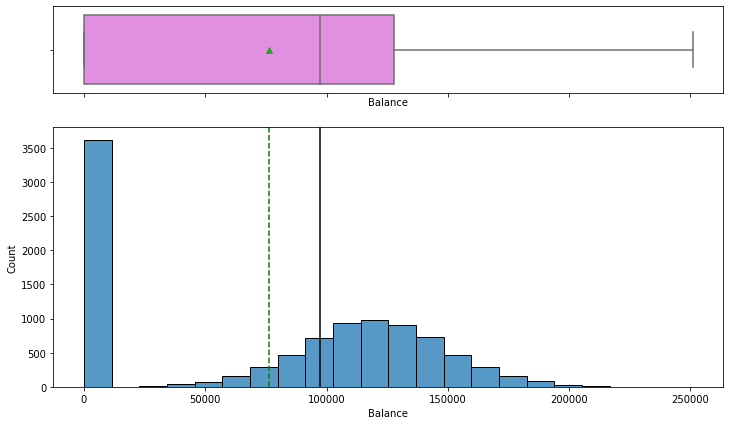

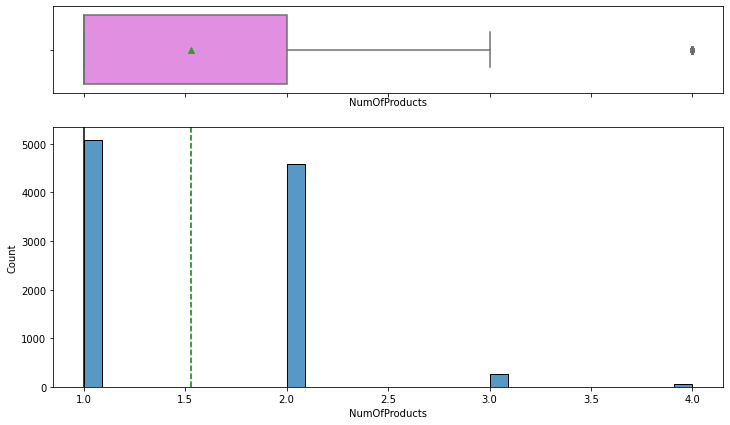

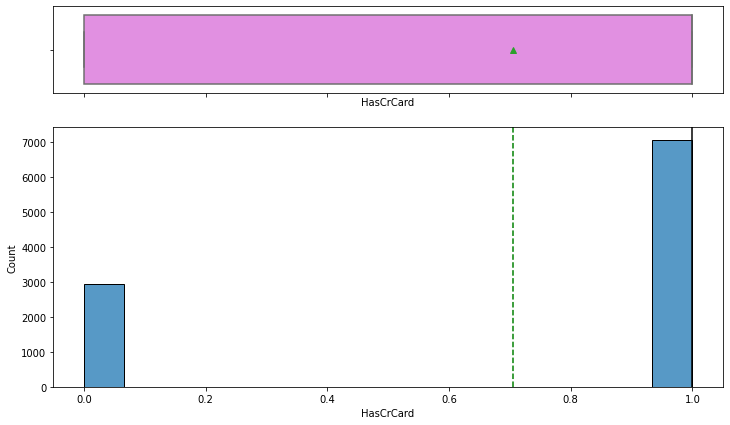

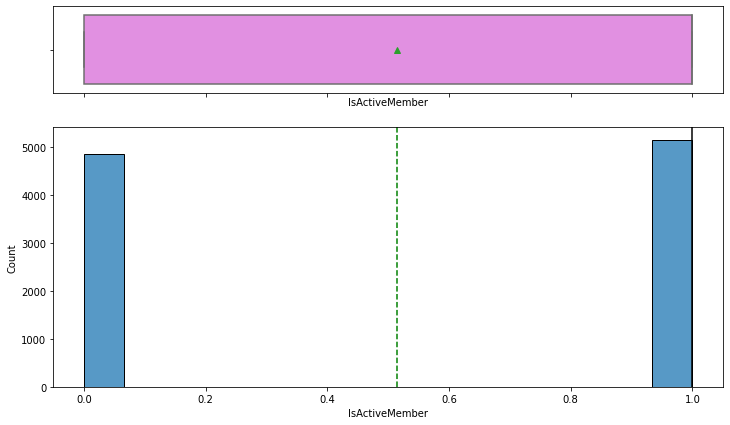

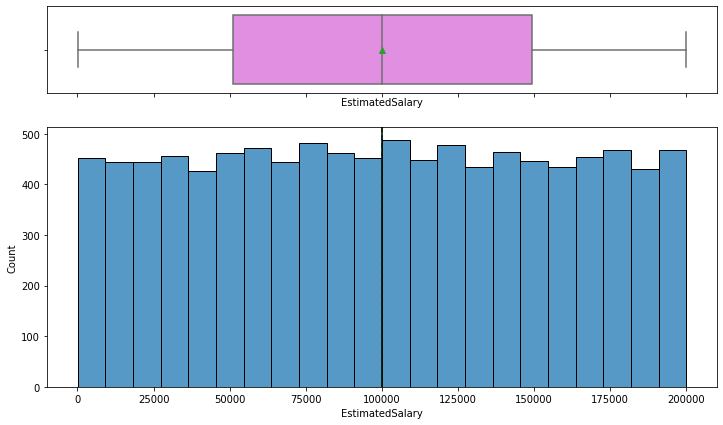

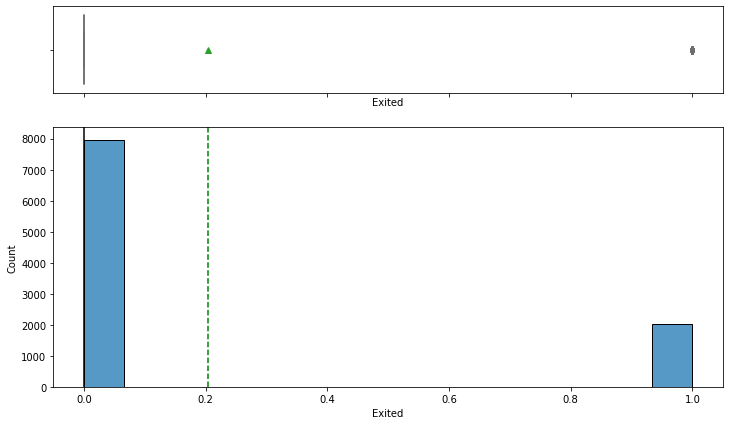

In [31]:
# selecting numerical columns
# this creates boxplots for all numerical data fields. 
num_col = df2.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df2, item)

In [32]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
..       ...   ...    ...
79         4     0      4
78         5     0      5
77        10     0     10
76        11     0     11
75         9     0      9

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


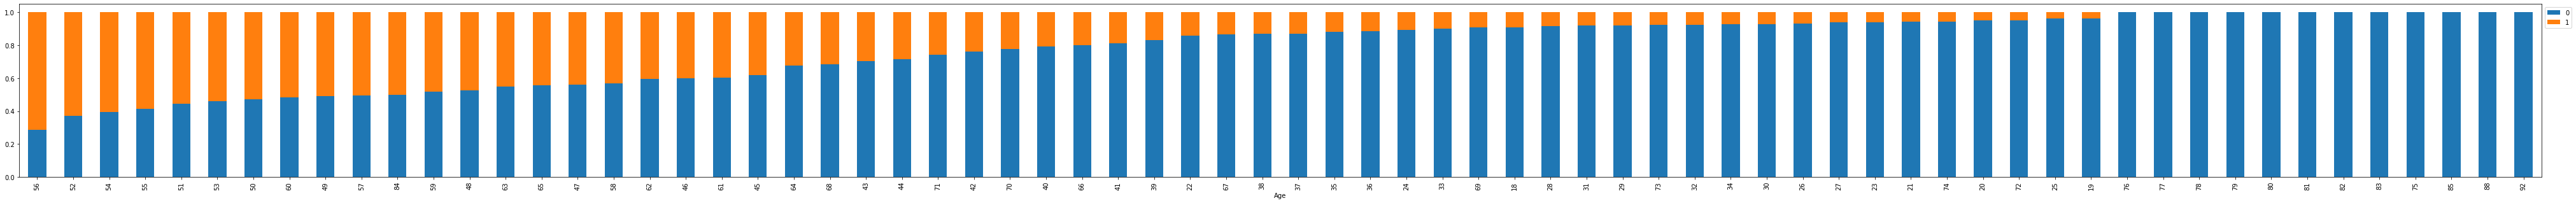

In [33]:
stacked_barplot(df2, "Age", "Exited")

This is a morbid chart. It shows that there is a gradual steady increase in people leaving the bank by age, and that everyone leaves the bank in the end. 

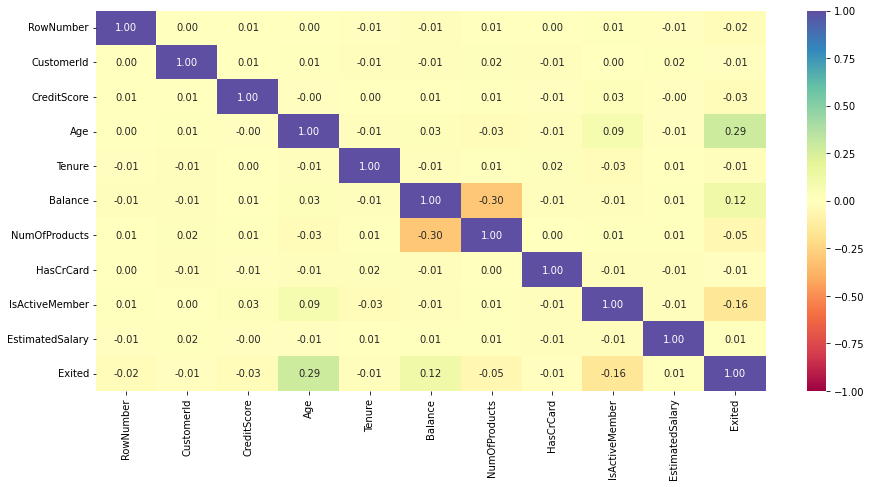

In [34]:
plt.figure(figsize=(15, 7))
sns.heatmap(df2[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [35]:
# Eliminate unnecessary data. Row number, customer ID, and Surname are not information categories that can be used to influence prediction. 
## Dropping useless data.
# dropping RowNumber, CustomerID, Surname. 
cdf2 = df2.copy()
df2.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


To work on the project, you should start with data preprocessing and EDA using descriptive statistics and data visualization.
In data preprocessing you need to encode the independent target variables and standardize/normalize only numerical variables. 
Once the EDA is completed and the data is preprocessed, you can use the data to build a model, check its performance based on the desired metric, and if it is not good then train other neural networks.
You should find the optimal value of the threshold using the ROC-AUC curve and use this threshold to covert probabilities into labels.
You should include all the models that you have trained in your notebook. 
It is important to close the analysis with key findings and conclusions.


Building Model 1

In [37]:
## sideline all the categorical columns for encoding. This is important. 
cat_col_df = df2.drop(['Geography','Gender'], axis=1)

In [38]:
## Task: Separate the Independent and Dependent Variables
X = df2.drop(['Exited'],axis=1)
y = df2[['Exited']]
print(X.shape)
print(y.shape)
print(type(X))

(10000, 10)
(10000, 1)
<class 'pandas.core.frame.DataFrame'>


In [39]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [40]:
df2['Balance'].skew() # Worried about skedness of data. 

-0.14110871094154384

In [41]:
df2['NumOfProducts'].skew()

0.7455678882823168

In [42]:
df2['HasCrCard'].skew()

-0.9018115952400578

In [43]:
df2['IsActiveMember'].skew()

-0.06043662833499078

In [44]:
df2['EstimatedSalary'].skew()

0.0020853576615585162

In [45]:
df2['Tenure'].skew()

0.01099145797717904

In [46]:
df2['Age'].skew()

1.0113202630234552

In [47]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [48]:
from sklearn.preprocessing import LabelEncoder # TO transform object to numericals.
labelencoder_RE = LabelEncoder()
df2['Gender']= labelencoder_RE.fit_transform(df2['Gender'])
df2['Geography']= labelencoder_RE.fit_transform(df2['Geography'])

In [49]:
df2['Geography'].skew()


0.5009158414285837

In [50]:
df2['Gender'].skew()

-0.1835959100396862

In [51]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000,1,1,1,101348.880,1
1,608,2,0,41,1,83807.860,1,0,1,112542.580,0
2,502,0,0,42,8,159660.800,3,1,0,113931.570,1
3,699,0,0,39,1,0.000,2,0,0,93826.630,0
4,850,2,0,43,2,125510.820,1,1,1,79084.100,0


In [52]:
Age_log=np.log(df2['Age'])
Age_log.skew()

0.182020112559587

In [53]:
#Standard scaler
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
from sklearn.preprocessing import StandardScaler
#df2['NCreditScore'] = StandardScaler().fit_transform(df2['CreditScore'].values.reshape(-1,1))  # Normalize 'CreditScore' in [-1,+1] range
#df2= df2.drop(['CreditScore'],axis=1)
#, 'NAge', 'NBalance', 'NEstimatedSalary'
#df2['NAge'] = StandardScaler().fit_transform(df2['Age'].values.reshape(-1,1))  # Normalize 'CreditScore' in [-1,+1] range
#df2= df2.drop(['Age'],axis=1)
#df2['NBalance'] = StandardScaler().fit_transform(df2['Balance'].values.reshape(-1,1))  # Normalize 'CreditScore' in [-1,+1] range
#df2= df2.drop(['Balance'],axis=1)
#df2['NEstimatedSalary'] = StandardScaler().fit_transform(df2['EstimatedSalary'].values.reshape(-1,1))  # Normalize 'CreditScore' in [-1,+1] range
#df2= df2.drop(['EstimatedSalary'],axis=1)


In [54]:
NumOfProducts_log=np.log(df2['NumOfProducts'])
NumOfProducts_log.skew()

0.23959503969037352

In [55]:
# Then, Split the dataset into the Training and Testing. It may be valiable to consider a validation sample. 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

In [56]:
from sklearn.preprocessing import LabelEncoder
labelencoder_RE = LabelEncoder()
X_train['Gender']= labelencoder_RE.fit_transform(X_train['Gender'])
X_train['Geography']= labelencoder_RE.fit_transform(X_train['Geography'])
X_test['Gender']= labelencoder_RE.fit_transform(X_test['Gender'])
X_test['Geography']= labelencoder_RE.fit_transform(X_test['Geography'])


In [57]:
 # Checking that no column has missing values in train and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64
------------------------------
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [58]:
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore"]])
X_train[["CreditScore"]] = temp.transform(X_train[["CreditScore"]])
X_test[["CreditScore"]] = temp.transform(X_test[["CreditScore"]])

In [59]:
sc=StandardScaler()
temp = sc.fit(X_train[["Age"]])
X_train[["Age"]] = temp.transform(X_train[["Age"]])
X_test[["Age"]] = temp.transform(X_test[["Age"]])

In [60]:
sc=StandardScaler()
temp = sc.fit(X_train[["Balance"]])
X_train[["Balance"]] = temp.transform(X_train[["Balance"]])
X_test[["Balance"]] = temp.transform(X_test[["Balance"]])

In [61]:
sc=StandardScaler()
temp = sc.fit(X_train[["EstimatedSalary"]])
X_train[["EstimatedSalary"]] = temp.transform(X_train[["EstimatedSalary"]])
X_test[["EstimatedSalary"]] = temp.transform(X_test[["EstimatedSalary"]])

In [62]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,1.059,0,1,1.715,7,-1.226,1,1,0,1.042
8392,0.914,1,1,-0.660,3,0.413,1,1,0,-0.624
5006,1.079,1,0,-0.185,0,0.602,2,1,1,0.308
4117,-0.929,0,1,-0.185,5,-1.226,2,1,0,-0.290
7182,0.427,1,1,0.955,6,0.548,2,0,1,0.135


In [63]:
# Splitting the dataset into the Training and validation set.
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,shuffle = True)

In [64]:
#printing the shape of the data 
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
#print(X_val.shape)
#print(y_val.shape)

(8000, 1)
(8000, 10)
(2000, 1)
(2000, 10)


In [65]:
X_train.head() #Checking the data is ready for modeling  

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,1.059,0,1,1.715,7,-1.226,1,1,0,1.042
8392,0.914,1,1,-0.660,3,0.413,1,1,0,-0.624
5006,1.079,1,0,-0.185,0,0.602,2,1,1,0.308
4117,-0.929,0,1,-0.185,5,-1.226,2,1,0,-0.290
7182,0.427,1,1,0.955,6,0.548,2,0,1,0.135


In [66]:
X_train.dtypes#Checking the data is ready for modeling

CreditScore        float64
Geography            int64
Gender               int64
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [67]:
y_train.head()

,Exited
2151,1
8392,1
5006,0
4117,0
7182,0


In [68]:
y_train.nunique()

Exited    2
dtype: int64

In [69]:
# use the data to build the first model

In [70]:
backend.clear_session() # release The memory. It optimizes and speeds modeling. 
#Setting the frequency for the random number generator.
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [71]:
# Initializing the Neural Network
model = Sequential()
# Dimensions in hidden layer should be the average of input and output layers, in this case 64. 
# First model
model.add(Dense(activation = 'relu', input_dim = 10, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [72]:
# Create optimizer with a default learning rate
# Compile
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [74]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4895 - accuracy: 0.7928 - val_loss: 0.4669 - val_accuracy: 0.7987
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.7942 - val_loss: 0.4518 - val_accuracy: 0.7931
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.7953 - val_loss: 0.4476 - val_accuracy: 0.7962
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.7972 - val_loss: 0.4453 - val_accuracy: 0.7962
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.7997 - val_loss: 0.4430 - val_accuracy: 0.7975
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8048 - val_loss: 0.4416 - val_accuracy: 0.8044
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8092 - val_loss: 0.4434 - val_accuracy: 0.8031
Epoch 

Everything after Epoch 18 is static. I will employ early stopping. 

63/63 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8395


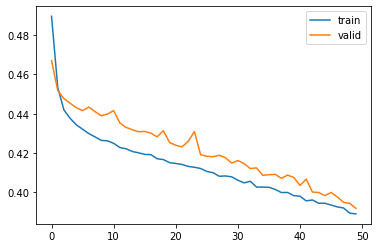

In [75]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

In [76]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [77]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # Text inside the confusion matrix labels
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

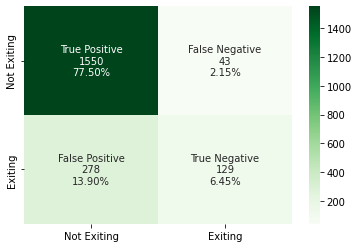

In [78]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Greens')

In [79]:
#Accuracy as per the classification report; Accuracy is a good predictor with imbalanced data. f-1 score indicates a good score when customer left bank: .89. 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1593
           1       0.75      0.32      0.45       407

    accuracy                           0.84      2000
   macro avg       0.80      0.64      0.68      2000
weighted avg       0.83      0.84      0.81      2000



Best Threshold=0.214514, G-Mean=0.747


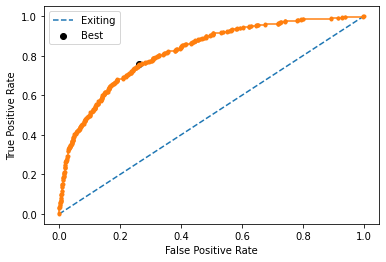

In [80]:
from sklearn.metrics import roc_curve # The RoC curve is another good predictor when data is imbalanced. 

from matplotlib import pyplot


# predict probabilities
yhat1 = model.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='Exiting')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Model 1 is not worth keeping. There is nothing under the ROC curve. 

MODEL 2

In [81]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [82]:
# Initializing the ANN
model2 = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 10.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model2.add(Dense(256, activation = 'relu', input_dim = X_train.shape[1], kernel_initializer='he_uniform'))
#Add 1st hidden layer
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# Adding another hidden layer
model2.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model2.add(Dense(1, activation = 'sigmoid')) 

In [83]:
# Create optimizer with default learning rate
# Compile the model
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
_________________________________________________________________


In [85]:
history2=model2.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4712 - accuracy: 0.7967 - val_loss: 0.4343 - val_accuracy: 0.8213
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4204 - accuracy: 0.8180 - val_loss: 0.4148 - val_accuracy: 0.8231
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4063 - accuracy: 0.8289 - val_loss: 0.3963 - val_accuracy: 0.8431
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3947 - accuracy: 0.8353 - val_loss: 0.3837 - val_accuracy: 0.8456
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3786 - accuracy: 0.8411 - val_loss: 0.3803 - val_accuracy: 0.8512
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3717 - accuracy: 0.8464 - val_loss: 0.3682 - val_accuracy: 0.8469
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3584 - accuracy: 0.8491 - val_loss: 0.3615 - val_accuracy: 0.8537
Epoch 

63/63 [==============================] - 1s 2ms/step - loss: 0.8601 - accuracy: 0.8100


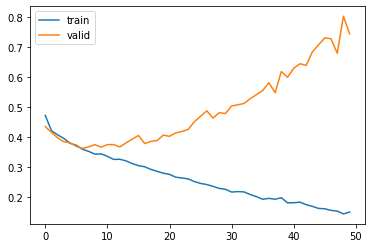

In [86]:
# Capturing learning history per epoch
hist2=pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results2 = model2.evaluate(X_test, y_test)

I believe this means that the model trains quickly. It shows some difficulty with predicting the test set at first but quickly learns. I see the possibility of overfitting after 18th EPOC as loss stops changing. 

Best Threshold=0.193086, G-Mean=0.708


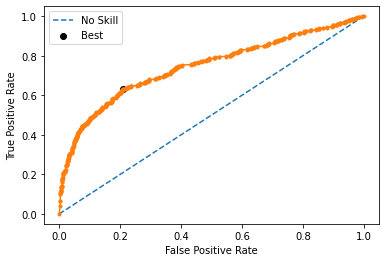

In [87]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

This model is not the best. There is virtually no skill or value in the prediction. 

In [88]:
y_pred2=model2.predict(X_test)
y_pred2 = (y_pred > 0.5)
y_pred2

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

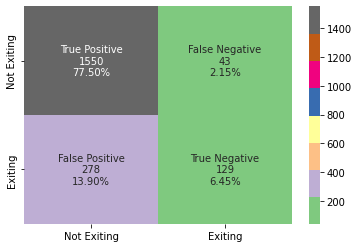

In [89]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Accent')

In [90]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1593
           1       0.75      0.32      0.45       407

    accuracy                           0.84      2000
   macro avg       0.80      0.64      0.68      2000
weighted avg       0.83      0.84      0.81      2000



MODEL 3

In [91]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [92]:
model3 = Sequential()
model3.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model3.add(BatchNormalization())
model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(1, activation = 'sigmoid'))

In [93]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [94]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [95]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
100/100 [==============================] - 2s 5ms/step - loss: 0.4809 - accuracy: 0.7764 - val_loss: 0.4586 - val_accuracy: 0.8019
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 0.8303 - val_loss: 0.4068 - val_accuracy: 0.8325
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3674 - accuracy: 0.8469 - val_loss: 0.3720 - val_accuracy: 0.8500
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3489 - accuracy: 0.8556 - val_loss: 0.3625 - val_accuracy: 0.8506
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3375 - accuracy: 0.8598 - val_loss: 0.3443 - val_accuracy: 0.8650
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.8598 - val_loss: 0.3392 - val_accuracy: 0.8637
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.8600 - val_loss: 0.3533 - val_accuracy: 0.8556

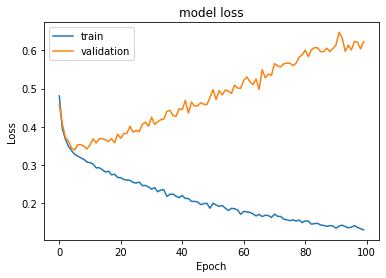

In [96]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.088391, G-Mean=0.727


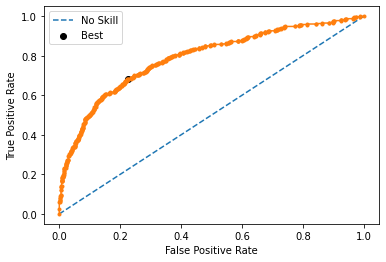

In [97]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot

This model actually shows some daylight under the ROC curve and will be trained. 

In [98]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [99]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1593
           1       0.44      0.68      0.53       407

    accuracy                           0.76      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.76      0.77      2000



MODEL 4

In [100]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [101]:
model4 = Sequential()
model4.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model4.add(Dropout(0.2))
model4.add(Dense(128,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(32,activation='relu'))
model4.add(Dense(1, activation = 'sigmoid'))
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [102]:
optimizer = tf.keras.optimizers.Adam(0.001)
model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [103]:
history_4 = model4.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4768 - accuracy: 0.7887 - val_loss: 0.4442 - val_accuracy: 0.8012
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.7991 - val_loss: 0.4418 - val_accuracy: 0.8250
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4337 - accuracy: 0.8086 - val_loss: 0.4270 - val_accuracy: 0.8275
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4205 - accuracy: 0.8189 - val_loss: 0.4084 - val_accuracy: 0.8419
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4146 - accuracy: 0.8256 - val_loss: 0.4069 - val_accuracy: 0.8419
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.8258 - val_loss: 0.3950 - val_accuracy: 0.8394
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8338 - val_loss: 0.3895 - val_accuracy: 0.8462
Epoch 

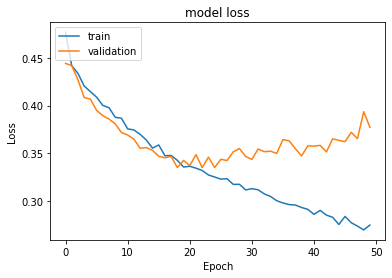

In [104]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.134507, G-Mean=0.740


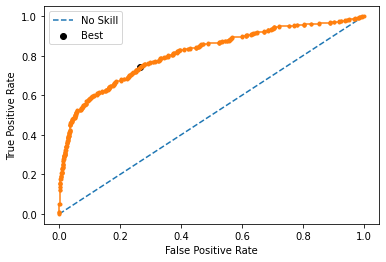

In [105]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = model4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [106]:
y_pred_e4=model4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

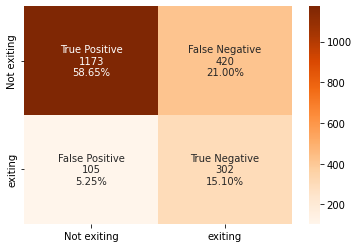

In [107]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not exiting','exiting']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Oranges')

In [108]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1593
           1       0.42      0.74      0.53       407

    accuracy                           0.74      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.82      0.74      0.76      2000



MODEL 5

In [109]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [110]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [111]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [112]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 0.4706 - accuracy: 0.7944 - val_loss: 0.4501 - val_accuracy: 0.8000
Best: 0.796375 using {'lr': 0.01, 'batch_size': 32}


In [113]:
estimator_v5=create_model_v5(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [114]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4678 - accuracy: 0.7934 - val_loss: 0.4505 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4461 - accuracy: 0.8031 - val_loss: 0.4386 - val_accuracy: 0.8250
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.8180 - val_loss: 0.4240 - val_accuracy: 0.8112
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8236 - val_loss: 0.4122 - val_accuracy: 0.8438
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.8223 - val_loss: 0.4013 - val_accuracy: 0.8431
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8309 - val_loss: 0.4026 - val_accuracy: 0.8431
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8289 - val_loss: 0.4021 - val_accuracy: 0.8425
Epoch 

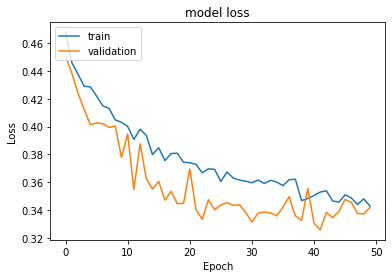

In [115]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.176579, G-Mean=0.767


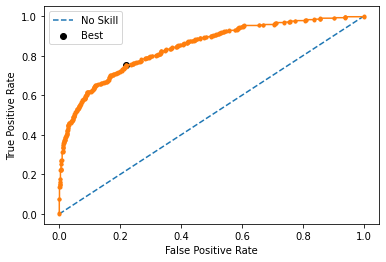

In [116]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [117]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

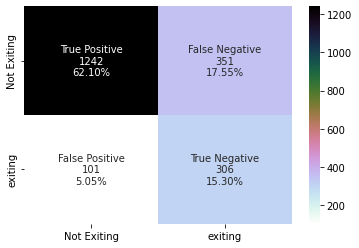

In [118]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exiting','exiting']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='cubehelix_r')

In [119]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1593
           1       0.47      0.75      0.58       407

    accuracy                           0.77      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



MODEL 6

In [120]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [121]:
def create_model_v6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [122]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [123]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
50/50 [==============================] - 1s 8ms/step - loss: 0.4662 - accuracy: 0.7841 - val_loss: 0.4442 - val_accuracy: 0.8000
Best: 0.797124 using {'batch_size': 128, 'lr': 0.01}
Total runtime of the program is 29.98756456375122


In [124]:
estimator_v6=create_model_v6(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [125]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_6=estimator_v6.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4678 - accuracy: 0.7934 - val_loss: 0.4505 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.8031 - val_loss: 0.4386 - val_accuracy: 0.8250
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.8180 - val_loss: 0.4240 - val_accuracy: 0.8112
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8236 - val_loss: 0.4122 - val_accuracy: 0.8438
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.8223 - val_loss: 0.4013 - val_accuracy: 0.8431
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8309 - val_loss: 0.4026 - val_accuracy: 0.8431
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8289 - val_loss: 0.4021 - val_accuracy: 0.8425
Epoch 

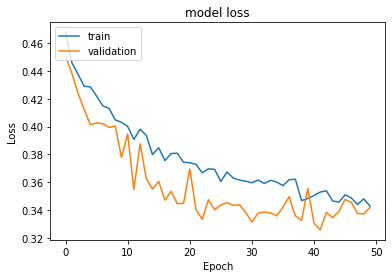

In [126]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.176579, G-Mean=0.767


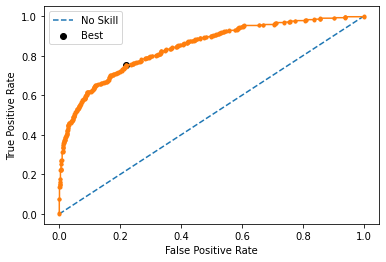

In [127]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat6 = estimator_v6.predict(X_test)
# keep probabilities for the positive outcome only
yhat6 = yhat6[:, 0]
# calculate roc curves
fpr, tpr, thresholds6 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans6 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans6)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds6[ix], gmeans6[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [128]:
y_pred_e6=estimator_v6.predict(X_test)
y_pred_e6 = (y_pred_e6 > thresholds5[ix])
y_pred_e6

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

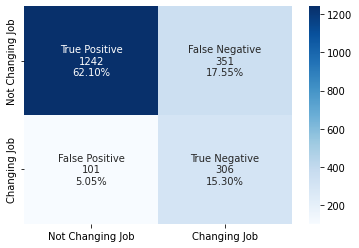

In [129]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm6=confusion_matrix(y_test, y_pred_e6)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm6, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [130]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e6)
print(cr6)

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1593
           1       0.47      0.75      0.58       407

    accuracy                           0.77      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



DASK
This model can also be run by Dask. Dask is an alternate to Scik-learn used when variables are huge. 

In [133]:
# Try below code to install dask in Google Colab
!pip install dask-ml 
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

In [134]:
# Try below code to install dask in Google Colab
!pip install dask-ml 
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

In [135]:
def create_model_v6_Dask(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [136]:
keras_estimator = KerasClassifier(build_fn=create_model_v6_Dask, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator, 
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [137]:
import time
  
# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

200/200 [==============================] - 2s 8ms/step - loss: 0.4771 - accuracy: 0.7950 - val_loss: 0.4446 - val_accuracy: 0.8000
Best: 0.798750 using {'batch_size': 32, 'lr': 0.001}
Total runtime of the program is 65.61159348487854


In [138]:
## Install Keras Tuner
!pip install keras-tuner 
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

     |████████████████████████████████| 133 kB 6.5 MB/s 


In [139]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [140]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [141]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [142]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [143]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)


Trial 5 Complete [00h 00m 17s]
val_accuracy: 0.837499996026357

Best val_accuracy So Far: 0.862708330154419
Total elapsed time: 00h 01m 47s
INFO:tensorflow:Oracle triggered exit


In [144]:
## Printing the best models with their hyperparameters
tuner.results_summary()


Results summary
Results in ./Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.862708330154419
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8564583460489908
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8550000190734863
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.837499996026357
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units

MODEL 7

In [145]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [146]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [147]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1760      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,505
Trainable params: 121,505
Non-trai

In [148]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [149]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 7ms/step - loss: 0.4798 - accuracy: 0.7939 - val_loss: 0.4336 - val_accuracy: 0.8138
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4205 - accuracy: 0.8141 - val_loss: 0.4131 - val_accuracy: 0.8338
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4043 - accuracy: 0.8259 - val_loss: 0.3959 - val_accuracy: 0.8413
Epoch 4/50
100/100 [==============================] - 1s 8ms/step - loss: 0.3869 - accuracy: 0.8366 - val_loss: 0.3836 - val_accuracy: 0.8519
Epoch 5/50
100/100 [==============================] - 1s 8ms/step - loss: 0.3678 - accuracy: 0.8458 - val_loss: 0.3805 - val_accuracy: 0.8494
Epoch 6/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3679 - accuracy: 0.8416 - val_loss: 0.3669 - val_accuracy: 0.8519
Epoch 7/50
100/100 [==============================] - 1s 8ms/step - loss: 0.3493 - accuracy: 0.8528 - val_loss: 0.3761 - val_accuracy: 0.8450
Epoch 

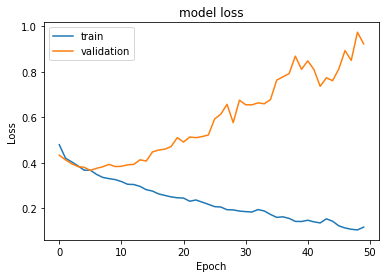

In [150]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

This model looks like it is close between train and test. 

Best Threshold=0.098936, G-Mean=0.714


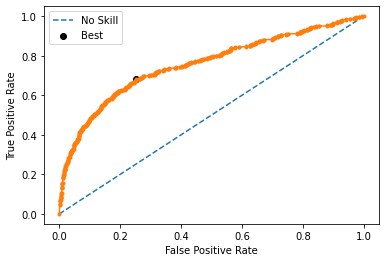

In [151]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

There is no predictability. 

In [152]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

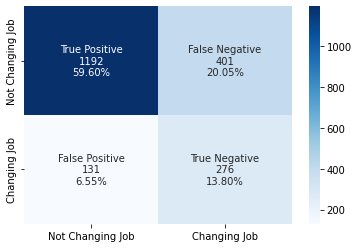

In [153]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [154]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1593
           1       0.41      0.68      0.51       407

    accuracy                           0.73      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.73      0.75      2000



SMOTE and KERAS
Can balance the dataset

In [155]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [156]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [157]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [158]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

In [159]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [160]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 26s]
val_accuracy: 0.674123485883077

Best val_accuracy So Far: 0.8025902708371481
Total elapsed time: 00h 02m 16s
INFO:tensorflow:Oracle triggered exit


In [161]:
tuner_2.results_summary()

Results summary
Results in ./Job_Switch
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8025902708371481
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.7913396159807841
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7700157165527344
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.674123485883077
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 3

MODEL 9

In [162]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [163]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [164]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1760      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,505
Trainable params: 121,505
Non-trai

In [165]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 [==============================] - 1s 5ms/step - loss: 0.5317 - accuracy: 0.7354 - val_loss: 0.6102 - val_accuracy: 0.6538
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4735 - accuracy: 0.7702 - val_loss: 1.0322 - val_accuracy: 0.4011
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4401 - accuracy: 0.7900 - val_loss: 0.6198 - val_accuracy: 0.6562
Epoch 4/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4108 - accuracy: 0.8075 - val_loss: 0.4426 - val_accuracy: 0.7830
Epoch 5/50
160/160 [==============================] - 1s 4ms/step - loss: 0.3960 - accuracy: 0.8176 - val_loss: 0.6825 - val_accuracy: 0.6299
Epoch 6/50
160/160 [==============================] - 1s 4ms/step - loss: 0.3828 - accuracy: 0.8208 - val_loss: 0.3561 - val_accuracy: 0.8469
Epoch 7/50
160/160 [==============================] - 1s 4ms/step - loss: 0.3654 - accuracy: 0.8338 - val_loss: 0.4606 - val_accuracy: 0.7398
Epoch 

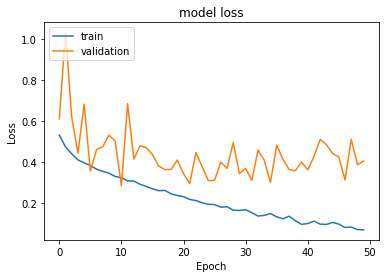

In [166]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.034838, G-Mean=0.696


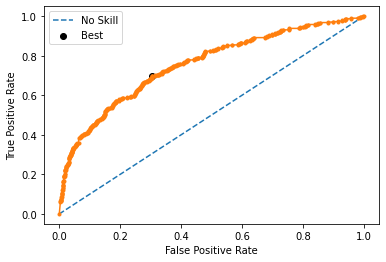

In [167]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [168]:
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

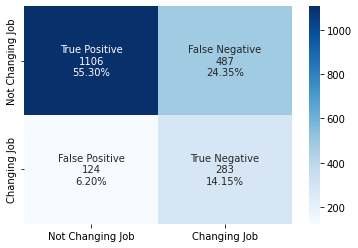

In [169]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [170]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e9)
print(cr6)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1593
           1       0.37      0.70      0.48       407

    accuracy                           0.69      2000
   macro avg       0.63      0.69      0.63      2000
weighted avg       0.79      0.69      0.72      2000



Adding GridSearchCV

In [171]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [172]:
def create_model_v7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [173]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

In [174]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 0.4706 - accuracy: 0.7944 - val_loss: 0.4501 - val_accuracy: 0.8000


In [175]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.798749 using {'batch_size': 32, 'lr': 0.01}


In [176]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [177]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
319/319 [==============================] - 2s 3ms/step - loss: 0.5588 - accuracy: 0.7214 - val_loss: 0.6648 - val_accuracy: 0.5561
Epoch 2/50
319/319 [==============================] - 1s 3ms/step - loss: 0.5194 - accuracy: 0.7480 - val_loss: 0.9200 - val_accuracy: 0.4855
Epoch 3/50
319/319 [==============================] - 1s 3ms/step - loss: 0.5057 - accuracy: 0.7605 - val_loss: 0.6062 - val_accuracy: 0.6146
Epoch 4/50
319/319 [==============================] - 1s 3ms/step - loss: 0.4893 - accuracy: 0.7699 - val_loss: 0.6141 - val_accuracy: 0.5856
Epoch 5/50
319/319 [==============================] - 1s 3ms/step - loss: 0.4877 - accuracy: 0.7708 - val_loss: 0.6648 - val_accuracy: 0.5181
Epoch 6/50
319/319 [==============================] - 1s 3ms/step - loss: 0.4750 - accuracy: 0.7760 - val_loss: 0.4650 - val_accuracy: 0.7512
Epoch 7/50
319/319 [==============================] - 1s 3ms/step - loss: 0.4629 - accuracy: 0.7826 - val_loss: 0.6119 - val_accuracy: 0.6111
Epoch 

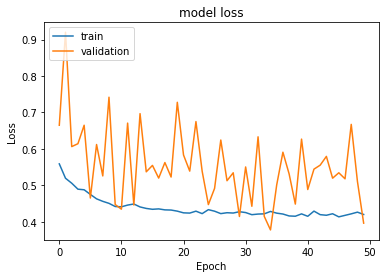

In [178]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.480482, G-Mean=0.762


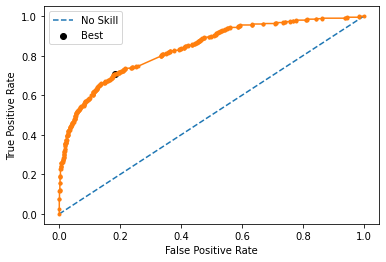

In [179]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [180]:
y_pred_e10=estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1593
           1       0.50      0.71      0.58       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.72      2000
weighted avg       0.83      0.80      0.81      2000



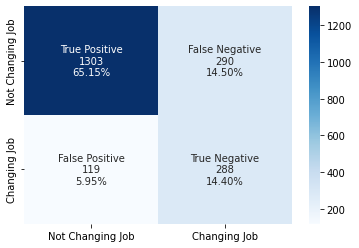

In [181]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')#Accuracy as per the classification report 
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

I believe that Model 3 was the best overall model and deserves further training with dropout and more hidden layers. I will retrain. 

**MODEL** 3A

In [182]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [183]:
model3A = Sequential()
model3A.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model3A.add(Dropout(0.2))
model3A.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model3A.add(BatchNormalization())
model3A.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model3A.add(BatchNormalization())
model3A.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model3A.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model3A.add(Dense(1, activation = 'sigmoid'))

In [184]:
model3A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [185]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3A.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [186]:
history_3A = model3A.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 0.5398 - accuracy: 0.7527 - val_loss: 0.4809 - val_accuracy: 0.7969
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7980 - val_loss: 0.4372 - val_accuracy: 0.8031
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.4416 - accuracy: 0.8094 - val_loss: 0.4131 - val_accuracy: 0.8288
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.4306 - accuracy: 0.8139 - val_loss: 0.4000 - val_accuracy: 0.8400
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8228 - val_loss: 0.3783 - val_accuracy: 0.8494
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8333 - val_loss: 0.3562 - val_accuracy: 0.8606
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.3968 - accuracy: 0.8278 - val_loss: 0.3499 - val_accuracy: 0.8600

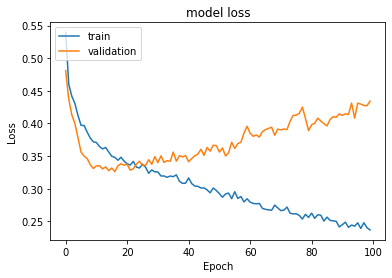

In [187]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3A.history['loss'])
plt.plot(history_3A.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.267643, G-Mean=0.738


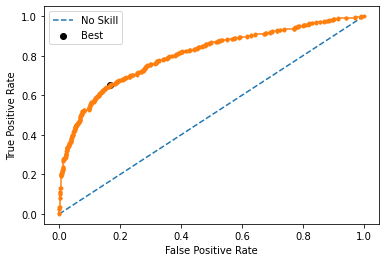

In [188]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3A = model3A.predict(X_test)
# keep probabilities for the positive outcome only
yhat3A = yhat3A[:, 0]
# calculate roc curves
fpr, tpr, thresholds3A = roc_curve(y_test, yhat3A)
# calculate the g-mean for each threshold
gmeans3A = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3A)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3A[ix], gmeans3A[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot

That is not an improvement in threshold and Gmean. Threshold went from .21 to .20, and Gmean from .56 to .55. 

Adding GridSearchCV

In [190]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [201]:
def create_model_v7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [202]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

In [203]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 [==============================] - 1s 6ms/step - loss: 0.4878 - accuracy: 0.7900 - val_loss: 0.5123 - val_accuracy: 0.8019


In [204]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.796375 using {'batch_size': 64, 'lr': 0.001}


In [205]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               2816      
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                      

In [206]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
160/160 [==============================] - 2s 5ms/step - loss: 0.5557 - accuracy: 0.7202 - val_loss: 0.6434 - val_accuracy: 0.5883
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4603 - accuracy: 0.7871 - val_loss: 0.6676 - val_accuracy: 0.5769
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4296 - accuracy: 0.8047 - val_loss: 0.5172 - val_accuracy: 0.7594
Epoch 4/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4061 - accuracy: 0.8138 - val_loss: 0.5774 - val_accuracy: 0.6852
Epoch 5/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4009 - accuracy: 0.8176 - val_loss: 0.5570 - val_accuracy: 0.6817
Epoch 6/50
160/160 [==============================] - 1s 4ms/step - loss: 0.3974 - accuracy: 0.8211 - val_loss: 0.3960 - val_accuracy: 0.8155
Epoch 7/50
160/160 [==============================] - 1s 4ms/step - loss: 0.3863 - accuracy: 0.8281 - val_loss: 0.4586 - val_accuracy: 0.7861
Epoch 

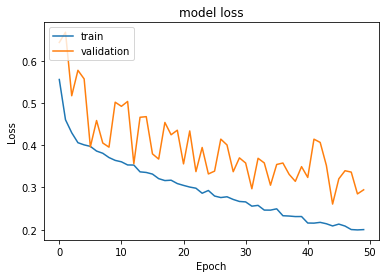

In [207]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.258435, G-Mean=0.754


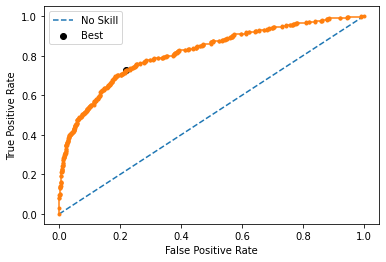

In [208]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [209]:
y_pred_e10=estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



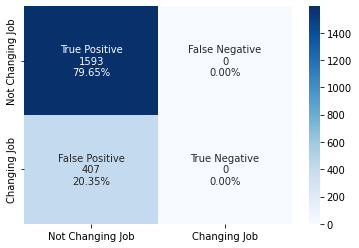

In [200]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')#Accuracy as per the classification report 
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

I believe that Model 3 was the best overall model and deserves further training with dropout and more hidden layers. I will retrain. 

##Findings and Conclusions##
Finding one: Everyone leaves the bank eventually.  

Finding Two: Many models are totally accurate at predicting True positives. Not many models can predict when a customer is not likely to leave the bank but does. 

Finding Three: Adding dropout did not compensate for imbalanced data so model 3 is the best overall model to predict wether or not someone will leave the bank. 

##Conclusion##
There are many variables to predict who will leave the bank. Age was the most directly correlated with leaving the bank, but this is possibly an inevitable conclusion. Furtherexperimental modeling could tune a better model and this should be explored. 

This notebook will be exported to Python as an .ipynb file. it will be saved as an .html file and both submitted. 